1. Consider the two dimensional data matrix [(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)].
Implement principal component analysis. Use this to obtain the feature in transformed
2D feature space. Plot the scatter plot of data points in both the original as well as
transformed domain.

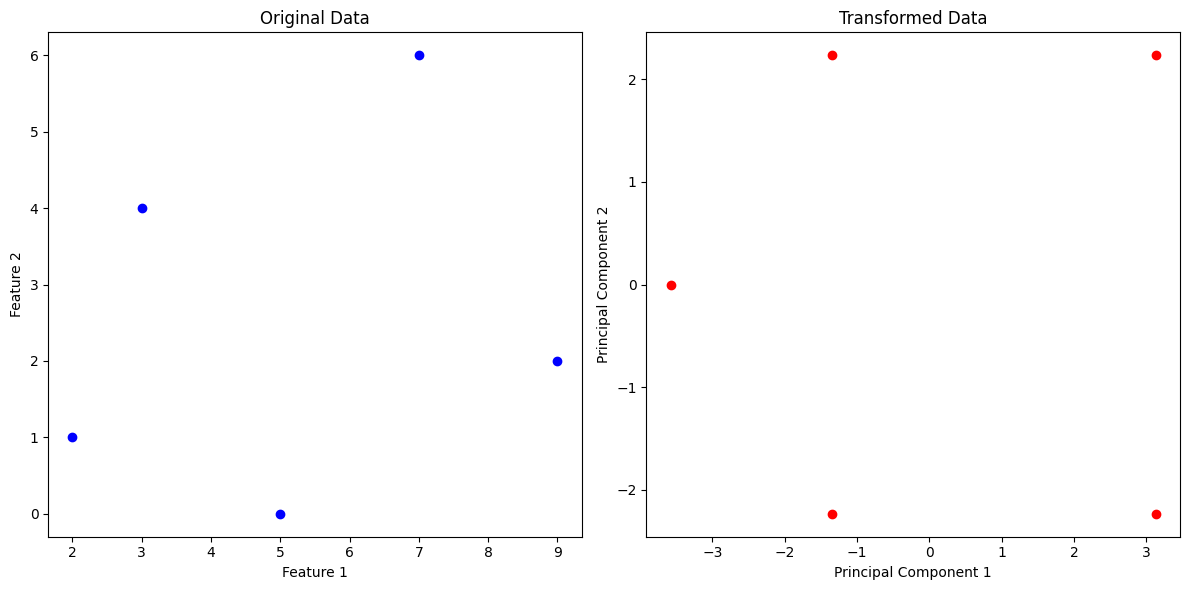

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)])

mean_data = np.mean(data, axis=0)
norm_data = data - mean_data

cov_mat = np.cov(norm_data, rowvar=False)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

trans_data = np.dot(norm_data, eig_vecs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], color='blue')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(trans_data[:, 0], trans_data[:, 1], color='red')
plt.title('Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


2. Implement Principal Component Analysis Algorithm and use it to reduce dimensions of Iris Dataset (from 4D to 2D). Plot the scatter plot for samples in the transformed domain with different colour codes for samples belonging to different classes.

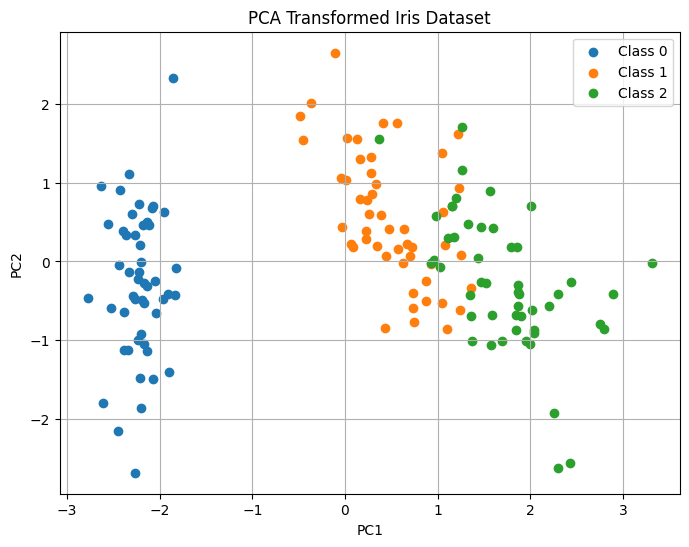

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_std[X_std == 0] = 1
X_stdzd = (X - X_mean) / X_std

cov_mat = np.cov(X_stdzd, rowvar=False)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

sorted_idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_idx]
eig_vecs = eig_vecs[:, sorted_idx]

proj_mat = eig_vecs[:, :2]

X_trans = np.dot(X_stdzd, proj_mat)

plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_trans[y == label, 0], X_trans[y == label, 1], label=f'Class {label}')

plt.title('PCA Transformed Iris Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()
